In [2]:
import funky
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython import display 
%matplotlib inline
#%matplotlib notebook

# Hierarchical mergers of binary black holes
## Group 6
| Student | Registration number |
|---------|---------------------|
| Bellavia Gabriele | 2160133 |
| Belli Luigi | 2152859 |
| Lera Margherita | 2142875 |
| Maida Giovanni Andrea | 2159404 |



A binary black hole can form via close encounters of black holes in a dense
stellar environment, such as a nuclear star cluster, a globular cluster or a young star cluster. In this
case, the two black holes may be single objects at birth, and pair up dynamically at some point in
their “life”. When two stellar-born black holes merge via gravitational wave emission, their merger
remnant is called **second-generation** black hole. If this binary black hole pairs and merges again, it gives birth to a **third-generation** black holes, and so on.
In this way, repeated black hole mergers in star clusters can give birth to hierarchical chains
of mergers, leading to the formation of more and more massive black holes.

### Differend kinds of clusters
As mentioned above, the data we analyzed come from simulations done with the program FASTCLUSTER ()

In [28]:
def update(gen):
    data_ysc = x1[x1.gen == gen]
    data_gc = x2[x2.gen == gen]
    data_nsc = x3[x3.gen == gen]

    funky.hist1d(ax[0], data_ysc.M1, data_gc.M1, data_nsc.M1, 3, 1e4, 'log', 'log', 'Primary Mass $(M_{\\odot})$', False)
    ax[0].set_ylim(1e-1,2e5)
    ax[0].set_title(f'Primary mass distribution, generation:{gen}')
    funky.hist1d(ax[1], data_ysc.M2, data_gc.M2, data_nsc.M2, 2, 9e3, 'log', 'log', 'Secondary Mass $(M_{\\odot})$', False)
    ax[1].set_ylim(3,1e5)
    ax[1].set_title(f'Secondary mass distribution, generation:{gen}')
    funky.hist1d(ax[2], data_ysc.S1, data_gc.S1, data_nsc.S1, -0.01, 1.01, 'linear', 'log', 'Primary Spin', False)
    ax[2].set_ylim(1e-1,2e5)
    ax[2].set_title(f'Primary spin distribution, generation:{gen}')
    funky.hist1d(ax[3], data_ysc.S2, data_gc.S2, data_nsc.S2, -0.01, 1.01, 'linear', 'log', 'Secondary Spin', False)
    ax[3].set_ylim(1e-1,2e5)
    ax[3].set_title(f'Secondary spin distribution, generation:{gen}')
    plt.suptitle(f'Generation: {gen}',weight='bold')
    plt.tight_layout()

x1 = funky.extractor('ysc')
x2 = funky.extractor('gc')
x3 = funky.extractor('nsc')

fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax = ax.flatten()  # Flatten the array of axes

ani = animation.FuncAnimation(fig, update, frames=np.arange(2, x3.gen.max()+1),interval=1000, repeat=True)

video = ani.to_html5_video()
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

In [31]:
def update(gen):
    data_ysc = x1[x1.gen == gen]
    data_gc = x2[x2.gen == gen]
    data_nsc = x3[x3.gen == gen]

    funky.hist1d(ax[0], data_ysc.Mrem, data_gc.Mrem, data_nsc.Mrem, 3, 1e5, 'log', 'log', 'Mass of the Remnant $(M_{\\odot})$', False)
    ax[0].set_ylim(1e0,2e5)
    ax[0].get_legend().remove()
    ax[0].set_title(f'Remnant mass distribution, generation:{gen}')
    funky.hist1d(ax[1], data_ysc.Srem, data_gc.Srem, data_nsc.Srem, -0.01,1.01 , 'linear', 'log', 'Spin of the Remnant', False)
    ax[1].set_ylim(1e0,1e6)
    ax[1].get_legend().remove()
    ax[1].set_title(f'Remnant spin distribution, generation:{gen}')
    funky.hist1d(ax[2], data_ysc.kick, data_gc.kick, data_nsc.kick, 0,1000 , 'linear', 'log', 'Relativistic kick of the remnant ($\\frac{km}{s}$)', False)
    ax[2].set_ylim(1,1e5)
    ax[2].axvline(data_ysc.esca_v.mean(), color='blue', label='$\\bar{v}_{esc, YSC}$')
    ax[2].errorbar(data_ysc.esca_v.mean(), 1e4, xerr=data_ysc.esca_v.std(), ecolor='blue',elinewidth=1000, alpha=0.2)
    ax[2].axvline(data_gc.esca_v.mean(), color='orange', label='$\\bar{v}_{esc, GC}$')
    ax[2].errorbar(data_gc.esca_v.mean(), 2e4, xerr=data_gc.esca_v.std(), ecolor='orange',elinewidth=1000, alpha=0.2)
    ax[2].axvline(data_nsc.esca_v.mean(), color='green', label='$\\bar{v}_{esc, NSC}$')
    ax[2].errorbar(data_nsc.esca_v.mean(), 3e4, xerr=data_nsc.esca_v.std(), ecolor='green', elinewidth=1000, alpha=0.2)
    ax[2].get_legend().remove()
    ax[2].set_title(f'Kick velocities distribution, generation:{gen}')

    funky.hist1d(ax[3], data_ysc.Mcluster, data_gc.Mcluster, data_nsc.Mcluster, 1, 1e8, 'log', 'log', 'Cluster Mass ($M_{\\odot}$)', False)
    
    ax[3].set_ylim(1e0,1e6)
    ax[3].get_legend().remove()
    ax[3].set_title(f'Cluster mass distribution, generation:{gen}')
    #ax[2].legend(loc="center", bbox_to_anchor=(0.5,-0.2), ncols=6)
    handles, labels = ax[2].get_legend_handles_labels()
    plt.suptitle(f'Generation:  {gen}',weight='bold')
    fig.legend(handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=6)
    plt.subplots_adjust(hspace=0.3)
    
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()  # Flatten the array of axes

ani = animation.FuncAnimation(fig, update, frames=np.arange(2, x3.gen.max()),interval=1000, repeat=True)
#ani.save('prova.mp4', writer='ffmpeg')
video = ani.to_html5_video()
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
plt.close() 

    




### Covariance Matrices, Feature Correlations

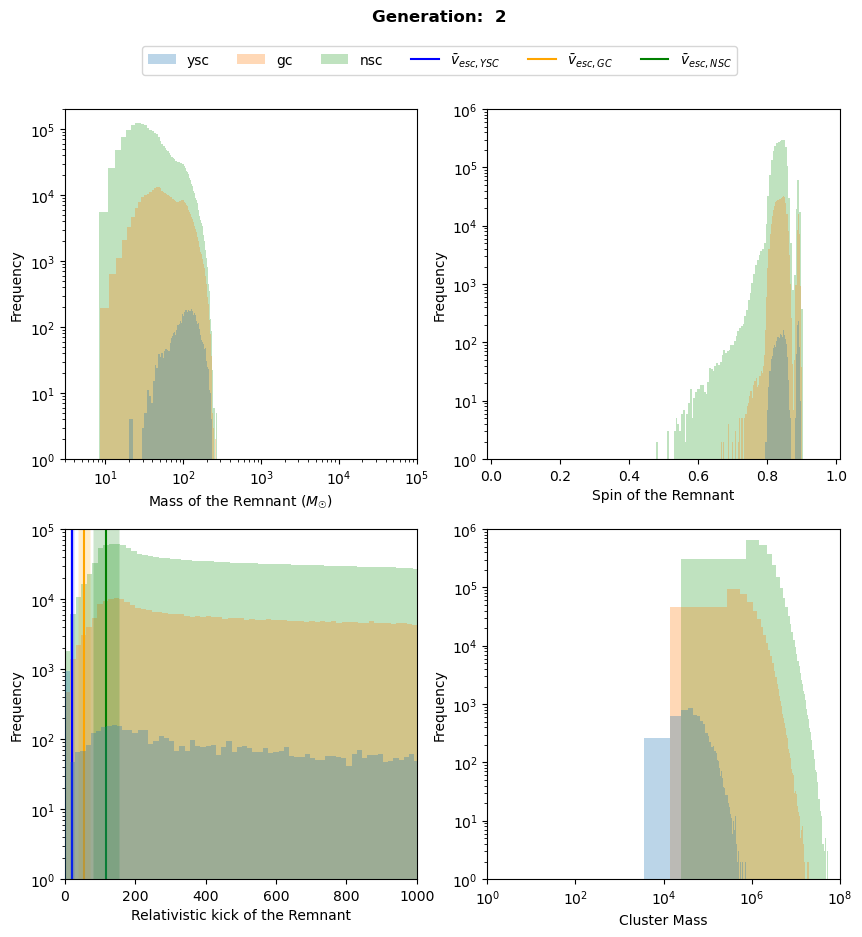

In [26]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle('')
gen=2
ax = ax.flatten() 
data_ysc = x1[x1.gen == gen]
data_gc = x2[x2.gen == gen]
data_nsc = x3[x3.gen == gen]

funky.hist1d(ax[0], data_ysc.Mrem, data_gc.Mrem, data_nsc.Mrem, 3, 1e5, 'log', 'log', 'Mass of the Remnant $(M_{\u2609})$', False)
ax[0].set_ylim(1e0,2e5)
ax[0].get_legend().remove()
funky.hist1d(ax[1], data_ysc.Srem, data_gc.Srem, data_nsc.Srem, -0.01,1.01 , 'linear', 'log', 'Spin of the Remnant', False)
ax[1].set_ylim(1e0,1e6)
ax[1].get_legend().remove()
funky.hist1d(ax[2], data_ysc.kick, data_gc.kick, data_nsc.kick, 0,1000 , 'linear', 'log', 'Relativistic kick of the Remnant', False)
ax[2].set_ylim(1,1e5)
ax[2].axvline(data_ysc.esca_v.mean(), color='blue', label='$\\bar{v}_{esc, YSC}$')
ax[2].errorbar(data_ysc.esca_v.mean(), 1e4, xerr=data_ysc.esca_v.std(), ecolor='blue',elinewidth=1000, alpha=0.2)
ax[2].axvline(data_gc.esca_v.mean(), color='orange', label='$\\bar{v}_{esc, GC}$')
ax[2].errorbar(data_gc.esca_v.mean(), 2e4, xerr=data_gc.esca_v.std(), ecolor='orange',elinewidth=1000, alpha=0.2)
ax[2].axvline(data_nsc.esca_v.mean(), color='green', label='$\\bar{v}_{esc, NSC}$')
ax[2].errorbar(data_nsc.esca_v.mean(), 3e4, xerr=data_nsc.esca_v.std(), ecolor='green', elinewidth=1000, alpha=0.2)
ax[2].get_legend().remove()

funky.hist1d(ax[3], data_ysc.Mcluster, data_gc.Mcluster, data_nsc.Mcluster, 1, 1e8, 'log', 'log', 'Cluster Mass', False)

ax[3].set_ylim(1e0,1e6)
ax[3].get_legend().remove()
#ax[2].legend(loc="center", bbox_to_anchor=(0.5,-0.2), ncols=6)
handles, labels = ax[2].get_legend_handles_labels()
plt.suptitle(f'Generation:  {gen}',weight='bold')
fig.legend(handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=6)
#plt.subplots_adjust()
plt.show()

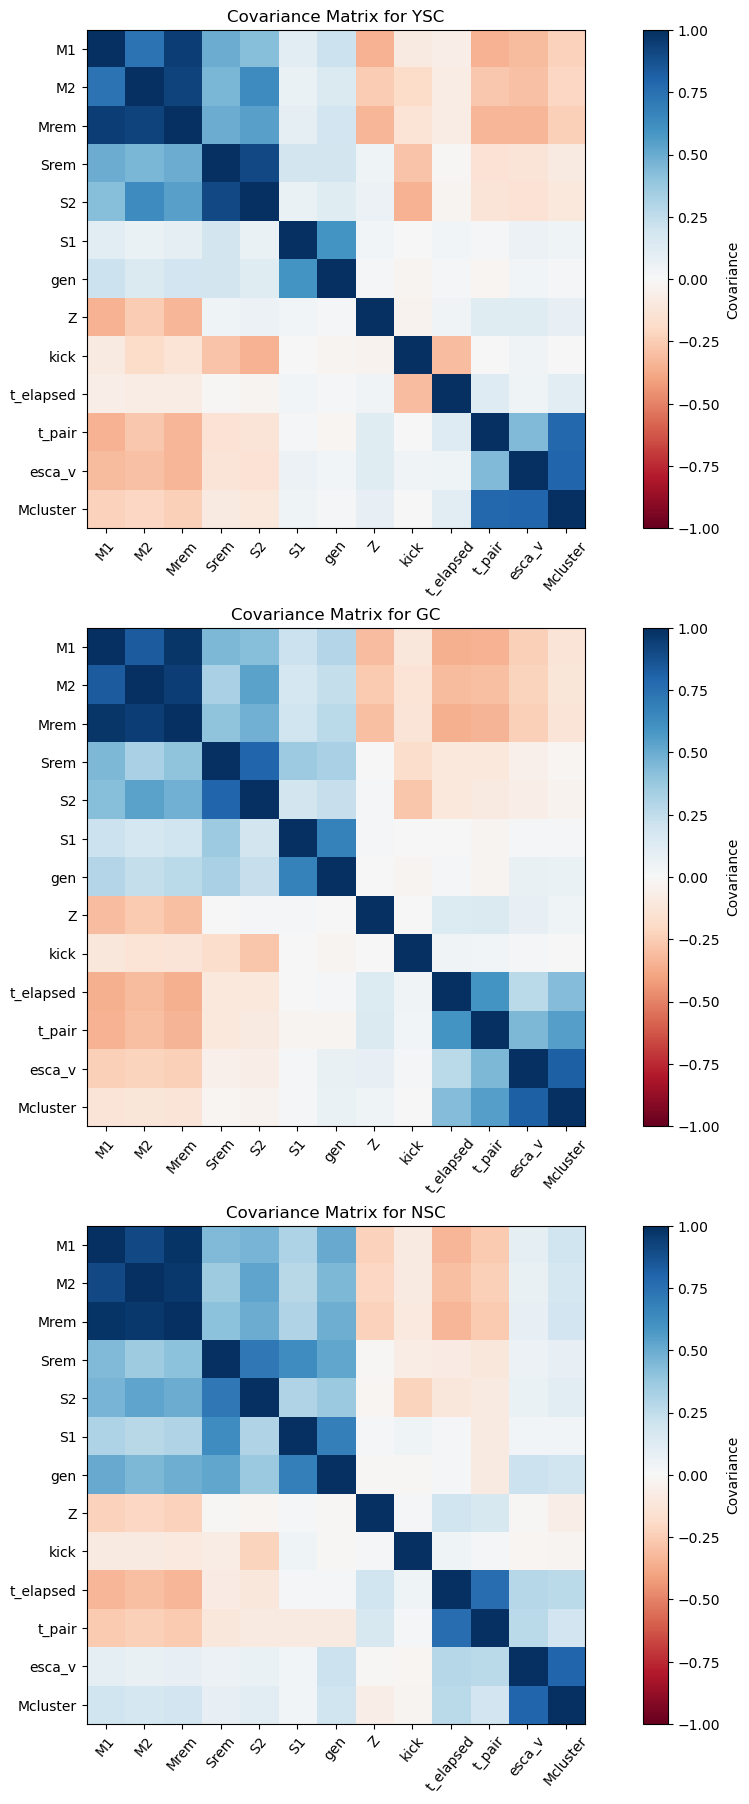

In [4]:
fig, ax = plt.subplots(3,1,figsize=(15,22))
plt.sca(ax[0])
funky.fast_covariance_matrix('ysc','RdBu')
plt.sca(ax[1])
funky.fast_covariance_matrix('gc', 'RdBu')
plt.sca(ax[2])
funky.fast_covariance_matrix('nsc', 'RdBu')
plt.show()